In [1]:
import os
from utils import display_app_graph
from dotenv import load_dotenv

load_dotenv()

True

In [3]:
from langchain_openai import ChatOpenAI
gpt = ChatOpenAI(model="gpt-4o-mini")

from langchain_ollama import ChatOllama

llama3 = ChatOllama(
    model="llama3.1:8b",
    temperature=0,
)

llama3_structured = ChatOllama(
    model="llama3.1:8b",
    temperature=0,
    format='json'
)

# Rodando o modelo externamente no google colab, por isso o ngrok
ollama_api_url = "https://proven-wanted-squid.ngrok-free.app/"

qwen2 = ChatOllama(
    model="qwen2.5:14b",
    temperature=0,
    base_url=ollama_api_url
)

qwen2_structured = ChatOllama(
    model="qwen2.5:14b",
    temperature=0,
    format='json',
    base_url=ollama_api_url
)

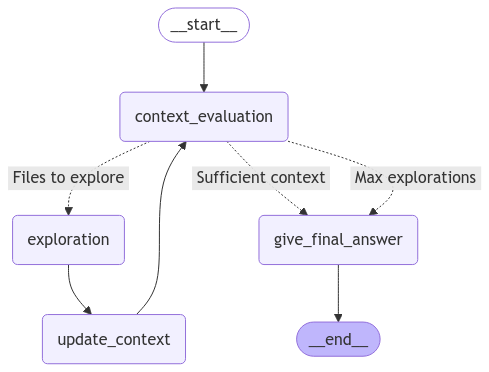

In [3]:
from recursive_file_exploration_rag import RFERag

rfe_rag = RFERag(
    llm = qwen2,
    structured_llm=qwen2_structured,
    prompts_folder="./prompts"
)
rfe_rag.add_datasource("./data")

rfe_rag.display_app_graph()

In [4]:
response = rfe_rag.answer("How many films have maximum score?")
print(response["answer"])

Error with the model response: Tunnel proven-wanted-squid.ngrok-free.app not found

ERR_NGROK_3200



ResponseError: Tunnel proven-wanted-squid.ngrok-free.app not found

ERR_NGROK_3200


In [8]:
print(response["context"])


    Avaliable datasources:
    '{'c:/Users/lucas/OneDrive/Documentos/Recursive-file-exploration-RAG/data/': ['Rotten Tomatoes Movies.csv']}'

    [[Start of Project notes]]
    [[Start of the current context]]
The project involves analyzing a dataset from the file 'Rotten Tomatoes Movies.csv' located at 'c:/Users/lucas/OneDrive/Documentos/Recursive-file-exploration-RAG/data/'. The dataset contains information about movies including their titles, ratings, genres, directors, writers, cast, release dates, studios, and scores from both critics (tomatometer_rating) and audiences. There are 16638 rows and 17 columns in the table.

The query to find how many films have the maximum score according to the dataset was executed successfully. The SQL query used is:
```sql
SELECT COUNT(*) AS max_score_count FROM (SELECT MAX(tomatometer_rating) AS max_rating FROM rotten_tomatoes_movies_table) t1 JOIN rotten_tomatoes_movies_table t2 ON t2.tomatometer_rating = t1.max_rating;
```
The result of the que